In [3]:
# !pip install xgboost

In [115]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,make_scorer

# from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, plot_roc_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import RobustScaler

In [116]:
df=pd.read_csv('packages/data/original/globalterrorismdb.csv',encoding = "ISO-8859-1")



c:\Users\Oumar Kane\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [71]:
def evaluation(modele, nom_modele, X_train, X_test, y_train, y_test, plot_roc = False):
        """Cette fonction permet d'évaluer un modèle
        """
        from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
        from sklearn.model_selection import learning_curve
        import numpy as np
        
        y_pred = modele.predict(X_test)
        
        print(f"La precision du modèle : {accuracy_score(y_test, y_pred)}")
        print(f"Matrice de confusion : \n{confusion_matrix(y_test, y_pred)}")
        print(f"Rapport de classification : \n{classification_report(y_test, y_pred)}")
        
        N, train_score, test_score = learning_curve(modele, X_train, y_train, cv = 5, train_sizes = np.linspace(0.1, 1, 10))
        
        fig, axs = plt.subplots(1, 2, figsize = (17, 8))  
        
        axs[0].plot(N, train_score.mean(axis = 1), label = "score_entrainement")
        axs[0].plot(N, test_score.mean(axis = 1), label = "score_test")
        axs[0].set_title(f"Evaluation {nom_modele}")
        axs[0].set_xlabel(f"Tailles")
        axs[0].set_ylabel(f"Scores")
        axs[0].legend()
        
        plot_roc_curve(modele, X_test, y_test, ax = axs[1])
        axs[1].set_title(f"Courbe ROC {nom_modele}")
         
        fig.tight_layout(w_pad = 3)
        

In [72]:
df['country_txt'].unique().tolist()

['Dominican Republic',
 'Mexico',
 'Philippines',
 'Greece',
 'Japan',
 'United States',
 'Uruguay',
 'Italy',
 'East Germany (GDR)',
 'Ethiopia',
 'Guatemala',
 'Venezuela',
 'West Germany (FRG)',
 'Switzerland',
 'Jordan',
 'Spain',
 'Brazil',
 'Egypt',
 'Argentina',
 'Lebanon',
 'Ireland',
 'Turkey',
 'Paraguay',
 'Iran',
 'United Kingdom',
 'Colombia',
 'Bolivia',
 'Nicaragua',
 'Netherlands',
 'Belgium',
 'Canada',
 'Australia',
 'Pakistan',
 'Zambia',
 'Sweden',
 'Costa Rica',
 'South Yemen',
 'Cambodia',
 'Israel',
 'Poland',
 'Taiwan',
 'Panama',
 'Kuwait',
 'West Bank and Gaza Strip',
 'Austria',
 'Czechoslovakia',
 'India',
 'France',
 'South Vietnam',
 'Brunei',
 'Zaire',
 "People's Republic of the Congo",
 'Portugal',
 'Algeria',
 'El Salvador',
 'Thailand',
 'Haiti',
 'Sudan',
 'Morocco',
 'Cyprus',
 'Myanmar',
 'Afghanistan',
 'Peru',
 'Chile',
 'Honduras',
 'Yugoslavia',
 'Ecuador',
 'New Zealand',
 'Malaysia',
 'Singapore',
 'Botswana',
 'Jamaica',
 'Chad',
 'North Yeme

In [122]:
data=df.copy()

country

In [118]:
data['country'].unique()

array([  58,  130,  160,   78,  101,  217,  218,   98,  499,   65,   83,
        222,  362,  199,  102,  185,   30,   60,   11,  110,   96,  209,
        158,   94,  603,   45,   26,  145,  142,   21,   38,   14,  153,
        230,  198,   49,  406,   36,   97,  161,  201,  156,  106,  155,
         15,  236,   92,   69,  428,   31,  604,  605,  162,    6,   61,
        205,   87,  195,  136,   53,  138,    4,  159,   43,   88,  235,
         59,  144,  121,  178,   29,  100,   42,  377,    7,  200,  184,
        215,  183,  104,   95,  182,  203,  186,  139,   17,  147,   20,
        207,   19,    8,  128,  173,   56,   93,  124,  403,  359,   55,
        349,   86,  137,  208,  213,  151,  111,   72,  113,   18,   89,
        174,  231,   84,   80,  532,   22,   81,  127,  221,    5,   41,
        176,   57,  164,   32,  196,  197,  116,   91,   70,   66,   33,
        143,  166,  146,  141,  204,   68,   67,   76,  122,  129,   90,
        108,  157,   44,  112,   47,  123,   75,  2

In [119]:
data[['country', 'country_txt']]

,country,country_txt
0,58,Dominican Republic
1,130,Mexico
2,160,Philippines
3,78,Greece
4,101,Japan
...,...,...
181686,182,Somalia
181687,200,Syria
181688,160,Philippines
181689,92,India


In [92]:
data['country_txt'].unique()


array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [74]:
# data = data[data['country_txt']=='Japan']

In [107]:
data = data[data['doubtterr']==0]

In [123]:
data = data[['imonth','iday','success', 'suicide',
       'attacktype1','targtype1',
       'natlty1','weaptype1', 'country', 'nkill']]

Enregistrements

In [120]:
liste_variables = ['attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt', 'natlty1', 'natlty1_txt',
                    'weaptype1', 'weaptype1_txt', 'country', 'country_txt']

In [112]:
data['country'].unique()

array([  58,  130,  160,   78,  217,  218,  499,   83,  222,  362,  199,
         98,  185,   30,   65,   60,   11,  110,  101,   96,  102,  209,
        158,   94,  603,   26,  145,   21,  142,   38,   14,  153,  230,
        198,  406,   36,   97,  161,  201,  156,  106,   15,  236,   92,
         69,  428,   45,   31,  604,  605,  162,    6,   61,  205,   87,
        195,   53,  138,    4,  136,  159,   43,   88,  235,   59,  121,
        178,  100,   42,  377,    7,  200,  184,  183,  104,  182,  203,
        186,  139,  147,   49,  155,   20,  207,   95,   19,    8,  128,
        173,   93,  359,  403,   55,  349,   86,  137,  213,  111,  113,
        215,   18,  208,   89,  231,   80,  532,   22,   81,   84,  127,
        221,    5,   41,  151,  176,   57,   32,  196,  116,   91,   70,
         66,   33,  124,  143,  166,  197,   29,  146,  141,  204,   68,
         56,   76,  174,  122,  129,   90,   44,  157,  112,  123,   75,
        108,  228,  168,  177,   37,   50,   74,  1

In [121]:
import pickle
for variable in liste_variables:
    with open(f'packages/data/sauvegardes/{variable}.txt', "wb") as f:
        pick = pickle.Pickler(f)
        pick.dump(data[variable].unique().tolist())

In [78]:
data.head()

,imonth,iday,latitude,longitude,success,suicide,attacktype1,targtype1,natlty1,weaptype1,country,nkill
0,7,2,18.456792,-69.951164,1,0,1,14,58.0,13,58,1.0
1,0,0,19.371887,-99.086624,1,0,6,7,21.0,13,130,0.0
2,1,0,15.478598,120.599741,1,0,1,10,217.0,13,160,1.0
3,1,0,37.997490,23.762728,1,0,3,7,217.0,6,78,NaN
5,1,1,37.005105,-89.176269,1,0,2,3,217.0,5,217,0.0


In [124]:
# data['latitude'].fillna(data['latitude'].mean(), inplace = True)
# data['longitude'].fillna(data['longitude'].mean(), inplace = True)
data['natlty1'].fillna(data['natlty1'].mode()[0], inplace = True)
data['nkill'].fillna(data['nkill'].mode()[0], inplace = True)
# data['multiple'].fillna(data['multiple'].mode()[0], inplace = True)
# data['individual'].fillna(data['individual'].mode()[0], inplace = True)
data['weaptype1'].fillna(data['weaptype1'].mode()[0], inplace = True)
data['targtype1'].fillna(data['targtype1'].mode()[0], inplace = True)
data['attacktype1'].fillna(data['attacktype1'].mode()[0], inplace = True)
data['targtype1'].fillna(data['targtype1'].mode()[0], inplace = True)
data.isnull().sum()

imonth         0
iday           0
success        0
suicide        0
attacktype1    0
targtype1      0
natlty1        0
weaptype1      0
country        0
nkill          0
dtype: int64

In [125]:
X = data[['imonth','iday','suicide','attacktype1','targtype1','natlty1','weaptype1', 'country', 'nkill']]
y = data['success']
print(X.head())
scaler = RobustScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state =1)

   imonth  iday  suicide  attacktype1  targtype1  natlty1  weaptype1  country  \
0       7     2        0            1         14     58.0         13       58   
1       0     0        0            6          7     21.0         13      130   
2       1     0        0            1         10    217.0         13      160   
3       1     0        0            3          7    217.0          6       78   
4       1     0        0            7          7    217.0          8      101   

   nkill  
0    1.0  
1    0.0  
2    1.0  
3    0.0  
4    0.0  


In [102]:
X.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [126]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
accuracy_score(y_test, prediction)

0.9123830489818382

In [127]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('LogReg Accuracy = {:.2f}'.format(lr.score(X_test,y_test)))

LogReg Accuracy = 0.89


In [128]:
rf = RandomForestClassifier(bootstrap=False)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print('RandFor Accuracy = {:.2f}'.format(rf.score(X_test,y_test)))

RandFor Accuracy = 0.91


La precision du modèle : 0.9102366538249862
Matrice de confusion : 
[[  965  1015]
 [  616 15574]]
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.61      0.49      0.54      1980
           1       0.94      0.96      0.95     16190

    accuracy                           0.91     18170
   macro avg       0.77      0.72      0.75     18170
weighted avg       0.90      0.91      0.91     18170



c:\Users\Oumar Kane\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


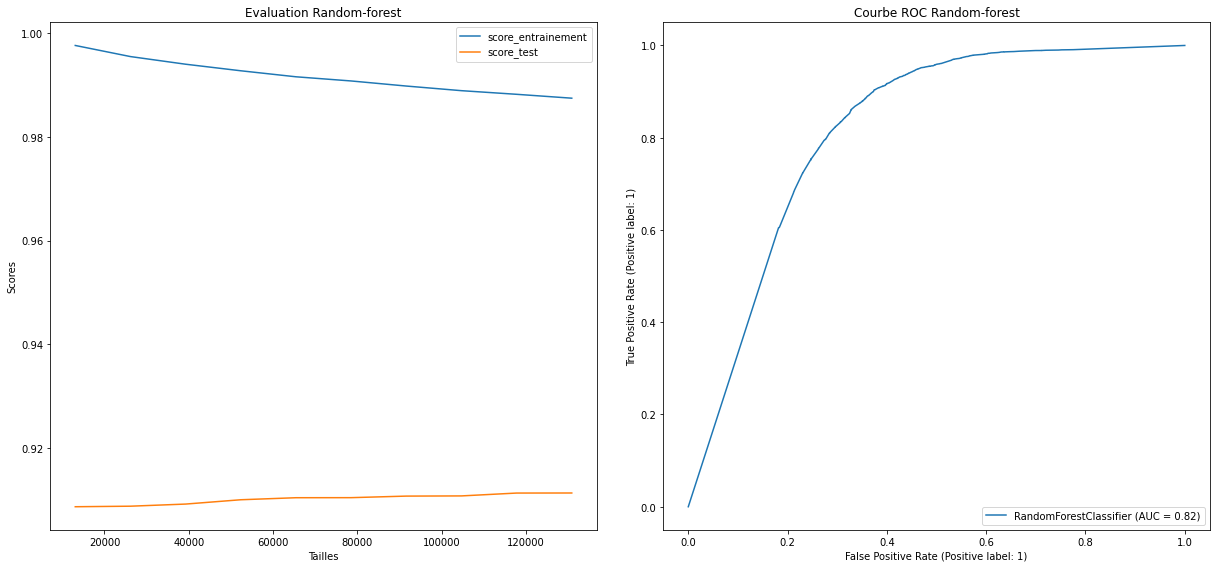

In [129]:
evaluation(rf, "Random-forest", X_train, X_test, y_train, y_test)

La precision du modèle : 0.8910291689598239
Matrice de confusion : 
[[    0  1980]
 [    0 16190]]
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1980
           1       0.89      1.00      0.94     16190

    accuracy                           0.89     18170
   macro avg       0.45      0.50      0.47     18170
weighted avg       0.79      0.89      0.84     18170



c:\Users\Oumar Kane\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Oumar Kane\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Oumar Kane\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

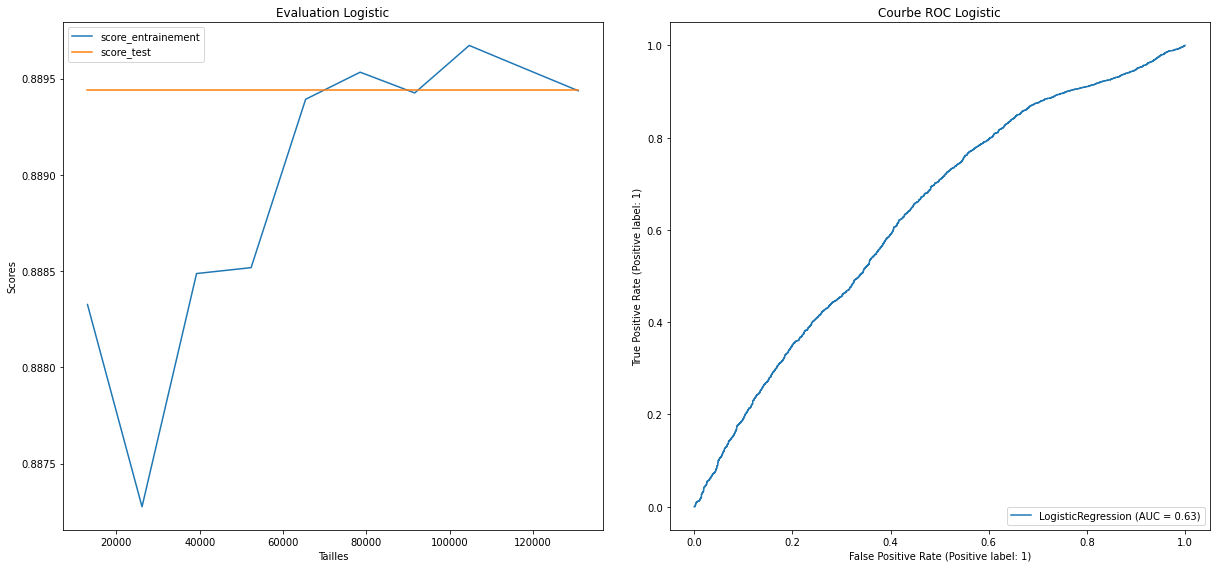

In [18]:
evaluation(lr, "Logistic", X_train, X_test, y_train, y_test)

In [19]:
evaluation(model, "Kneighbors", X_train, X_test, y_train, y_test)

La precision du modèle : 0.8941662080352228
Matrice de confusion : 
[[  563  1417]
 [  506 15684]]
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.53      0.28      0.37      1980
           1       0.92      0.97      0.94     16190

    accuracy                           0.89     18170
   macro avg       0.72      0.63      0.66     18170
weighted avg       0.87      0.89      0.88     18170



KeyboardInterrupt: 

Recuperation d'un modele en attendant que les tests se terminent

In [97]:
rf

RandomForestClassifier(bootstrap=False)

In [130]:
import pickle
with open('packages/modeles/RandomForest/random.txt', "wb") as f:
    picker = pickle.Pickler(f)
    picker.dump(rf)

In [101]:
X_test.shape

(13891, 11)

In [16]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print('SVC Accuracy = {:.2f}'.format(svc.score(X_test,y_test)))

In [43]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
print('DT Accuracy = {:.2f}'.format(dt.score(X_test,y_test)))

DT Accuracy = 0.79


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [50]:

param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review y

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, chec

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, chec

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, chec

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, chec

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, chec

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, chec

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [51]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.score(X_test,y_test))

0.8502415458937198
{'metric': 'manhattan', 'n_neighbors': 11}
0.875


In [58]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred_gbc = gbc.predict(X_test)
y_predict_gbc = gbc.predict(X_train)
print('GBC Accuracy = {:.2f}'.format(gbc.score(X_test,y_test)))

GBC Accuracy = 0.92


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1348: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.object)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1570: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sample_mask = np.ones((n_samples, ), dtype=np.bool)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1

In [77]:
logreg=LogisticRegression()
parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review y

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by its

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not c

ValueError: penalty='none' is not supported for the liblinear solver

In [78]:
print(logreg_cv.best_score_)
print(logreg_cv.best_params_)
print(logreg_cv.score(X_test,y_test))

0.8454106280193237
{'C': 0.1, 'penalty': 'l2'}
0.9166666666666666


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
